# Chinese Stock Indices Analysis

### Outline

This report will seek to answer the following questions:
    
    1.) What was the change in price of the stock indices over time?
    2.) What was the daily return of the stock indices on average?
    3.) What was the moving average of various stock indices?
    4.) What was the correlation between different stock indices' closing prices?
    5.) What was the correlation between different stock indices' daily returns?
    6.) How much value do we put at risk by investing in a particular stock index?

### Q1 - Basic Analysis of Stock Indices Information

In [104]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
  
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("ggplot")
%matplotlib inline

from __future__ import division

import seaborn as sns
sns.set_style("whitegrid")

#pd.set_option("display.notebook_repr_html",True)
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",10)
pd.set_option("display.width",78)
pd.set_option("precision",4)

###
!pip install seaborn tushare  -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

In [105]:
#tushare's URL: http://tushare.waditu.com/trading.html#id2
import tushare as tsh

stock_list = {"c_DJIA":"sz50","c_SP500":"hs300","c_NASDAQ":"cyb"}

for stock,code in stock_list.items():
    globals()[stock] = tsh.get_hist_data(code,start="2010-06-01",end="2016-08-04")

In [106]:
c_DJIA

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-08-04,2145.660,2146.600,2143.840,2130.170,149556.62,-1.950,-0.09,2148.176,2157.795,2168.824,163449.58,196858.41,229021.37
2016-08-03,2140.150,2149.890,2145.790,2136.600,153068.94,-2.660,-0.12,2152.170,2161.189,2169.975,185289.11,199949.50,235032.39
2016-08-02,2145.820,2151.290,2148.450,2138.190,125921.11,0.890,0.04,2157.806,2163.322,2171.041,230544.93,199204.53,239648.17
2016-08-01,2151.540,2155.790,2147.560,2136.110,201553.95,-7.680,-0.36,2164.618,2166.017,2172.062,242172.81,208421.56,249505.98
2016-07-29,2163.640,2166.850,2155.240,2151.930,187147.30,-8.570,-0.40,2167.016,2170.059,2172.848,230918.31,217793.34,254859.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-20,1603.394,1628.683,1594.540,1588.223,273860.47,-14.325,-0.89,1600.314,1600.314,1600.314,300266.23,300266.23,300266.23
2013-08-19,1576.570,1617.335,1608.865,1574.023,267736.38,16.071,1.01,1601.757,1601.757,1601.757,306867.67,306867.67,306867.67
2013-08-16,1590.915,1711.432,1592.794,1573.720,527554.00,-2.358,-0.15,1599.388,1599.388,1599.388,319911.43,319911.43,319911.43


In [107]:
c_SP500

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-08-04,3190.546,3201.553,3201.288,3170.418,7.3504e+07,7.781,0.24,3192.917,3212.960,3231.734,7.6717e+07,8.9384e+07,1.0190e+08
2016-08-03,3179.684,3197.157,3193.507,3173.535,7.2864e+07,4.455,0.14,3196.887,3218.083,3232.167,8.4572e+07,9.0634e+07,1.0415e+08
2016-08-02,3173.757,3189.052,3189.052,3165.542,6.2168e+07,12.243,0.39,3201.834,3222.493,3233.332,1.0204e+08,9.0617e+07,1.0675e+08
2016-08-01,3196.425,3199.975,3176.809,3156.748,8.7003e+07,-27.121,-0.85,3217.941,3228.411,3234.249,1.0581e+08,9.3289e+07,1.1016e+08
2016-07-29,3217.192,3225.418,3203.930,3198.683,8.8045e+07,-17.206,-0.53,3228.756,3236.933,3235.643,1.0245e+08,9.5620e+07,1.1247e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-20,2325.862,2353.409,2312.465,2303.666,7.3086e+07,-18.965,-0.81,2323.739,2323.739,2323.739,8.0767e+07,8.0767e+07,8.0767e+07
2013-08-19,2286.203,2340.194,2331.430,2284.077,7.2483e+07,27.286,1.18,2326.558,2326.558,2326.558,8.2687e+07,8.2687e+07,8.2687e+07
2013-08-16,2314.261,2423.081,2304.144,2295.023,1.2037e+08,-17.432,-0.75,2324.933,2324.933,2324.933,8.6088e+07,8.6088e+07,8.6088e+07


In [108]:
c_NASDAQ

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-08-04,2107.623,2133.176,2129.652,2102.272,9.1039e+06,21.338,1.01,2114.554,2164.334,2212.388,9.1407e+06,1.2058e+07,1.4591e+07
2016-08-03,2110.234,2117.617,2108.314,2096.731,7.7992e+06,-4.900,-0.23,2116.573,2177.881,2217.602,1.0176e+07,1.2603e+07,1.4976e+07
2016-08-02,2096.550,2114.953,2113.214,2094.116,7.5522e+06,14.035,0.67,2125.987,2193.903,2224.264,1.3067e+07,1.3318e+07,1.5273e+07
2016-08-01,2113.674,2118.090,2099.179,2066.175,1.1031e+07,-23.233,-1.09,2159.254,2209.954,2230.904,1.4046e+07,1.4091e+07,1.5702e+07
2016-07-29,2144.272,2147.194,2122.412,2109.132,1.0217e+07,-17.332,-0.81,2188.595,2225.023,2238.381,1.4320e+07,1.4419e+07,1.6040e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-20,1170.987,1180.986,1175.783,1164.376,5.4494e+06,4.381,0.37,1165.404,1165.404,1165.404,5.6643e+06,5.6643e+06,5.6643e+06
2013-08-19,1126.635,1172.029,1171.402,1125.586,4.8786e+06,39.316,3.47,1162.810,1162.810,1162.810,5.7180e+06,5.7180e+06,5.7180e+06
2013-08-16,1158.962,1178.843,1132.086,1131.444,5.7599e+06,-35.008,-3.00,1159.945,1159.945,1159.945,5.9978e+06,5.9978e+06,5.9978e+06


In [109]:
#save to excel file
c_DJIA.to_excel("c_DJIA.xlsx",sheet_name="Sheet1")
c_SP500.to_excel("c_SP500.xlsx",sheet_name="Sheet1")
c_NASDAQ.to_excel("c_NASDAQ.xlsx",sheet_name="Sheet1")

In [110]:
c_DJIA_a = c_DJIA.sort_index(axis=0, ascending=True)
c_DJIA_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,1622.209,1643.000,1610.218,1605.283,236975.62,-9.525,-0.59,1610.218,1610.218,1610.218,236975.62,236975.62,236975.62
2013-08-15,1608.621,1624.335,1595.152,1593.689,195204.67,-15.066,-0.94,1602.685,1602.685,1602.685,216090.15,216090.15,216090.15
2013-08-16,1590.915,1711.432,1592.794,1573.720,527554.00,-2.358,-0.15,1599.388,1599.388,1599.388,319911.43,319911.43,319911.43
2013-08-19,1576.570,1617.335,1608.865,1574.023,267736.38,16.071,1.01,1601.757,1601.757,1601.757,306867.67,306867.67,306867.67
2013-08-20,1603.394,1628.683,1594.540,1588.223,273860.47,-14.325,-0.89,1600.314,1600.314,1600.314,300266.23,300266.23,300266.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,2163.640,2166.850,2155.240,2151.930,187147.30,-8.570,-0.40,2167.016,2170.059,2172.848,230918.31,217793.34,254859.30
2016-08-01,2151.540,2155.790,2147.560,2136.110,201553.95,-7.680,-0.36,2164.618,2166.017,2172.062,242172.81,208421.56,249505.98
2016-08-02,2145.820,2151.290,2148.450,2138.190,125921.11,0.890,0.04,2157.806,2163.322,2171.041,230544.93,199204.53,239648.17


In [111]:
c_NASDAQ_a = c_NASDAQ.sort_index(axis=0, ascending=True)
c_NASDAQ_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,1175.625,1186.293,1180.656,1160.022,6.3172e+06,8.327,0.71,1180.656,1180.656,1180.656,6.3172e+06,6.3172e+06,6.3172e+06
2013-08-15,1177.854,1184.399,1167.094,1165.769,5.9163e+06,-13.562,-1.15,1173.875,1173.875,1173.875,6.1168e+06,6.1168e+06,6.1168e+06
2013-08-16,1158.962,1178.843,1132.086,1131.444,5.7599e+06,-35.008,-3.00,1159.945,1159.945,1159.945,5.9978e+06,5.9978e+06,5.9978e+06
2013-08-19,1126.635,1172.029,1171.402,1125.586,4.8786e+06,39.316,3.47,1162.810,1162.810,1162.810,5.7180e+06,5.7180e+06,5.7180e+06
2013-08-20,1170.987,1180.986,1175.783,1164.376,5.4494e+06,4.381,0.37,1165.404,1165.404,1165.404,5.6643e+06,5.6643e+06,5.6643e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,2144.272,2147.194,2122.412,2109.132,1.0217e+07,-17.332,-0.81,2188.595,2225.023,2238.381,1.4320e+07,1.4419e+07,1.6040e+07
2016-08-01,2113.674,2118.090,2099.179,2066.175,1.1031e+07,-23.233,-1.09,2159.254,2209.954,2230.904,1.4046e+07,1.4091e+07,1.5702e+07
2016-08-02,2096.550,2114.953,2113.214,2094.116,7.5522e+06,14.035,0.67,2125.987,2193.903,2224.264,1.3067e+07,1.3318e+07,1.5273e+07


In [112]:
c_SP500_a = c_SP500.sort_index(axis=0, ascending=True)
c_SP500_a

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2013-08-14,2362.619,2386.599,2349.080,2340.833,7.5942e+07,-9.988,-0.42,2349.080,2349.080,2349.080,7.5942e+07,7.5942e+07,7.5942e+07
2013-08-15,2348.839,2362.089,2321.576,2319.784,6.1952e+07,-27.504,-1.17,2335.328,2335.328,2335.328,6.8947e+07,6.8947e+07,6.8947e+07
2013-08-16,2314.261,2423.081,2304.144,2295.023,1.2037e+08,-17.432,-0.75,2324.933,2324.933,2324.933,8.6088e+07,8.6088e+07,8.6088e+07
2013-08-19,2286.203,2340.194,2331.430,2284.077,7.2483e+07,27.286,1.18,2326.558,2326.558,2326.558,8.2687e+07,8.2687e+07,8.2687e+07
2013-08-20,2325.862,2353.409,2312.465,2303.666,7.3086e+07,-18.965,-0.81,2323.739,2323.739,2323.739,8.0767e+07,8.0767e+07,8.0767e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,3217.192,3225.418,3203.930,3198.683,8.8045e+07,-17.206,-0.53,3228.756,3236.933,3235.643,1.0245e+08,9.5620e+07,1.1247e+08
2016-08-01,3196.425,3199.975,3176.809,3156.748,8.7003e+07,-27.121,-0.85,3217.941,3228.411,3234.249,1.0581e+08,9.3289e+07,1.1016e+08
2016-08-02,3173.757,3189.052,3189.052,3165.542,6.2168e+07,12.243,0.39,3201.834,3222.493,3233.332,1.0204e+08,9.0617e+07,1.0675e+08


In [114]:
# Summary Stats
c_DJIA.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,727.0000,727.0000,727.0000,727.0000,7.2700e+02,727.0000,727.0000,727.0000,727.0000,727.0000,7.2700e+02,7.2700e+02,7.2700e+02
mean,2050.4094,2075.3058,2052.8153,2027.1757,5.9079e+05,0.7208,0.0562,2051.3276,2049.4064,2045.4489,5.9108e+05,5.9132e+05,5.9160e+05
std,508.6818,520.4853,508.5865,494.0927,5.7406e+05,45.0661,1.8725,507.5223,506.4972,504.2346,5.5142e+05,5.3783e+05,5.1892e+05
min,1402.8130,1420.9010,1406.9150,1402.1820,1.0577e+05,-247.7500,-9.3800,1420.8180,1424.7090,1440.7950,1.2515e+05,1.3142e+05,1.3807e+05
25%,1600.5975,1614.0055,1600.3185,1588.6380,2.0619e+05,-13.2935,-0.7200,1601.4230,1602.1410,1604.0895,2.2268e+05,2.3241e+05,2.3717e+05
50%,2075.2100,2098.0600,2078.7600,2062.1700,3.3191e+05,-0.2190,-0.0100,2083.0220,2088.1030,2089.8370,3.2751e+05,3.3773e+05,3.4546e+05
75%,2392.0070,2424.5255,2397.1825,2359.1935,7.8019e+05,16.0805,0.8800,2392.4995,2402.3375,2406.2430,7.9643e+05,7.8488e+05,8.3739e+05
max,3494.8230,3494.8230,3458.7070,3376.0250,3.7746e+06,191.6600,7.8400,3388.0900,3330.2680,3282.7680,3.2801e+06,2.6563e+06,2.1490e+06


In [115]:
# General Info
c_DJIA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 2016-08-04 to 2013-08-14
Data columns (total 13 columns):
open            727 non-null float64
high            727 non-null float64
close           727 non-null float64
low             727 non-null float64
volume          727 non-null float64
price_change    727 non-null float64
p_change        727 non-null float64
ma5             727 non-null float64
ma10            727 non-null float64
ma20            727 non-null float64
v_ma5           727 non-null float64
v_ma10          727 non-null float64
v_ma20          727 non-null float64
dtypes: float64(13)
memory usage: 79.5+ KB


In [116]:
# Summary Stats
c_SP500.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,729.0000,729.0000,729.0000,729.000,7.2900e+02,729.0000,729.0000,729.0000,729.0000,729.0000,7.2900e+02,7.2900e+02,7.2900e+02
mean,3047.9332,3082.6305,3051.7436,3013.949,1.6827e+08,1.2185,0.0604,3049.3946,3046.3652,3040.0768,1.6829e+08,1.6823e+08,1.6808e+08
std,783.0873,799.5932,782.9020,760.278,1.3378e+08,66.3363,1.8167,781.4395,779.9670,776.4120,1.2945e+08,1.2713e+08,1.2423e+08
min,2079.8710,2118.7900,2086.9670,2077.759,3.5738e+07,-370.3210,-8.7500,2116.7500,2123.1560,2143.8330,3.9065e+07,4.0796e+07,4.1887e+07
25%,2351.8710,2367.4600,2350.7340,2333.299,7.1536e+07,-17.4840,-0.6400,2349.0800,2349.4340,2352.4180,7.7464e+07,7.6801e+07,7.5559e+07
50%,3080.6360,3112.4750,3090.0330,3055.251,1.1330e+08,2.0990,0.0700,3085.8420,3084.2520,3093.7400,1.1738e+08,1.1688e+08,1.1635e+08
75%,3523.6400,3561.8140,3530.8220,3486.102,2.1799e+08,25.0490,0.9300,3530.8760,3529.1080,3519.5580,2.1868e+08,2.2143e+08,2.1728e+08
max,5379.4700,5380.4260,5353.7510,5283.086,6.8644e+08,281.4490,6.7100,5324.4060,5256.0620,5143.8510,5.8270e+08,5.2843e+08,4.7430e+08


In [117]:
# General Info
c_SP500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 2016-08-04 to 2013-08-14
Data columns (total 13 columns):
open            729 non-null float64
high            729 non-null float64
close           729 non-null float64
low             729 non-null float64
volume          729 non-null float64
price_change    729 non-null float64
p_change        729 non-null float64
ma5             729 non-null float64
ma10            729 non-null float64
ma20            729 non-null float64
v_ma5           729 non-null float64
v_ma10          729 non-null float64
v_ma20          729 non-null float64
dtypes: float64(13)
memory usage: 79.7+ KB


In [118]:
# Summary Stats
c_NASDAQ.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
count,729.0000,729.0000,729.0000,729.0000,7.2900e+02,729.0000,729.0000,729.0000,729.0000,729.0000,7.2900e+02,7.2900e+02,7.2900e+02
mean,1913.6282,1945.4531,1917.3754,1884.6561,1.1086e+07,1.3978,0.1171,1914.7850,1911.4505,1904.3225,1.1079e+07,1.1057e+07,1.0995e+07
std,612.1656,628.7998,611.6582,591.8257,6.0124e+06,57.5833,2.4798,610.4231,608.8954,604.2653,5.7066e+06,5.5797e+06,5.4757e+06
min,1126.6350,1172.0290,1132.0860,1125.5860,2.0220e+05,-285.6780,-8.9100,1159.9450,1159.9450,1159.9450,2.7961e+06,2.8519e+06,2.9916e+06
25%,1385.9590,1400.9160,1387.6630,1374.2980,5.8966e+06,-18.2360,-1.0700,1381.5890,1372.0830,1369.9420,5.9376e+06,5.9188e+06,5.8756e+06
50%,1757.2340,1783.6180,1772.8450,1743.0240,9.6143e+06,2.9410,0.1800,1744.5540,1731.7580,1704.1410,9.9267e+06,1.0052e+07,9.4822e+06
75%,2266.0830,2289.0490,2265.1280,2245.9370,1.5627e+07,27.3010,1.5100,2261.8190,2254.4940,2244.8330,1.5640e+07,1.5638e+07,1.5707e+07
max,3994.4400,4037.9590,3982.2510,3850.5910,2.8889e+07,182.7900,7.1600,3886.3690,3843.8480,3710.0610,2.6185e+07,2.5281e+07,2.4070e+07


In [119]:
# General Info
c_NASDAQ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 2016-08-04 to 2013-08-14
Data columns (total 13 columns):
open            729 non-null float64
high            729 non-null float64
close           729 non-null float64
low             729 non-null float64
volume          729 non-null float64
price_change    729 non-null float64
p_change        729 non-null float64
ma5             729 non-null float64
ma10            729 non-null float64
ma20            729 non-null float64
v_ma5           729 non-null float64
v_ma10          729 non-null float64
v_ma20          729 non-null float64
dtypes: float64(13)
memory usage: 79.7+ KB


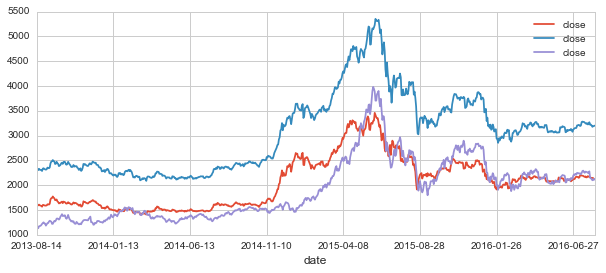

In [122]:
# historical view of the closing price
c_DJIA_a['close'].plot(legend=True,figsize=(10,4))
c_SP500_a['close'].plot(legend=True,figsize=(10,4))
c_NASDAQ_a['close'].plot(legend=True,figsize=(10,4))

### Q2 - Daily Return Analyisis

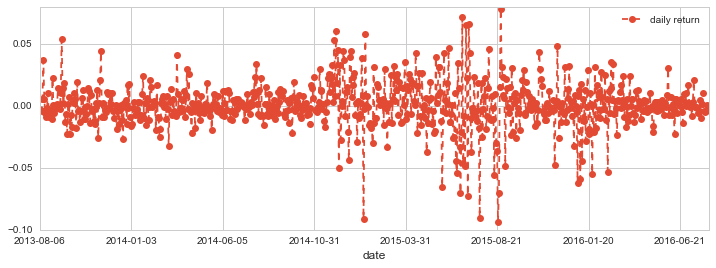

In [76]:
# We'll use pct_change to find the percent change for each day
c_DJIA_a['daily return'] = c_DJIA_a['close'].pct_change()
# Then we'll plot the daily return percentage
c_DJIA_a['daily return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

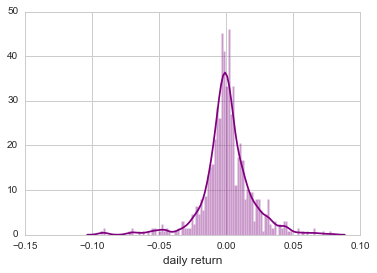

In [77]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(c_DJIA_a['daily return'].dropna(),bins=100,color='purple')

# Could have also done:
#c_DJIA_a['daily return'].hist()

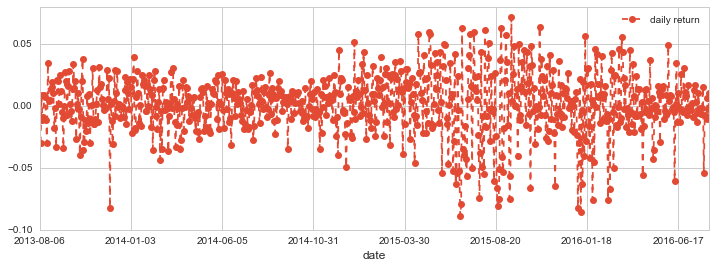

In [87]:
# We'll use pct_change to find the percent change for each day
c_NASDAQ_a['daily return'] = c_NASDAQ_a['close'].pct_change()
# Then we'll plot the daily return percentage
c_NASDAQ_a['daily return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

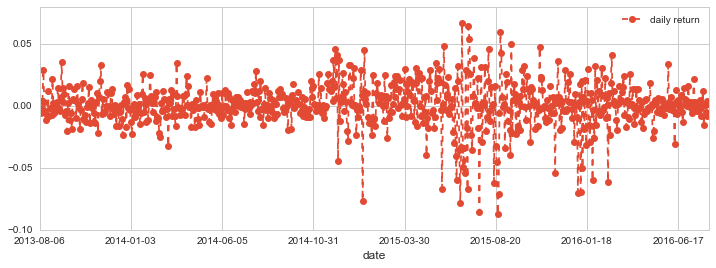

In [88]:
# We'll use pct_change to find the percent change for each day
c_SP500_a['daily return'] = c_SP500_a['close'].pct_change()
# Then we'll plot the daily return percentage
c_SP500_a['daily return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

### Q3 - Moving Average Analysis

Now that we've seen the visualizations for the closing price each day, let's go ahead and caculate the moving average for the stock indices

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [100]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [5,20,60]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    c_DJIA_a[column_name]=pd.rolling_mean(c_DJIA_a['close'],ma)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()


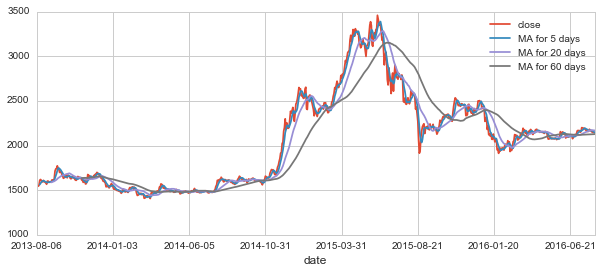

In [101]:
c_DJIA_a[['close','MA for 5 days','MA for 20 days','MA for 60 days']].plot(subplots=False,figsize=(10,4))

### Q4, Q5- Correlation Analysis of Closing Prices and Daily Returns 

In [50]:
## Grab all the closing prices for the stock indices list into one DataFrame
df_close = pd.DataFrame({
        'c_DJIA': c_DJIA_a.close, 'c_SP500': c_SP500_a.close, 'c_NASDAQ': c_NASDAQ_a.close
    },index = c_DJIA_a.index)
df_close

,c_DJIA,c_NASDAQ,c_SP500
date,,,
2013-08-06,1556.297,1211.782,2293.641
2013-08-07,1551.155,1175.702,2280.623
...,...,...,...
2016-08-03,2145.790,2108.314,3193.507
2016-08-04,2143.840,2129.652,3201.288


In [53]:
# Make a new index returns DataFrame
index_rets = df_close.pct_change()

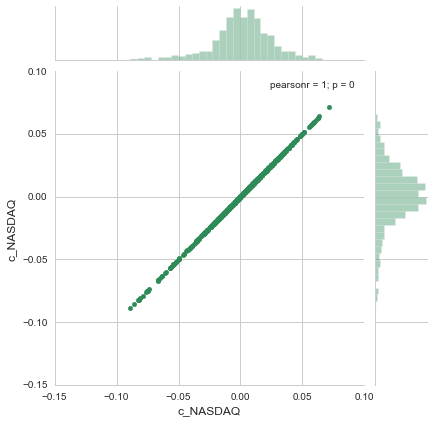

In [78]:
# Comparing NASDAQ to itself should show a perfectly linear relationship
sns.jointplot('c_NASDAQ','c_NASDAQ',index_rets,kind='scatter',color='seagreen')

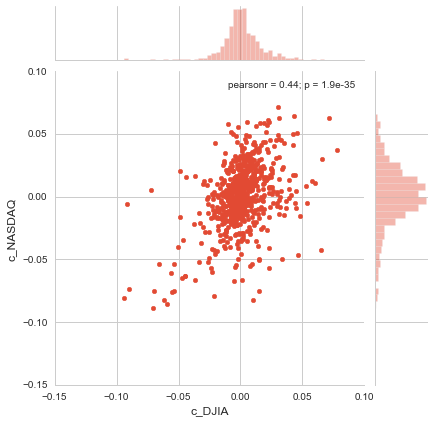

In [123]:
# We'll use joinplot to compare the daily returns of c_DJIA and c_NASDAQ
sns.jointplot('c_DJIA','c_NASDAQ',index_rets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our stock indices ticker list. We can use sns.pairplot() to automatically create this plot

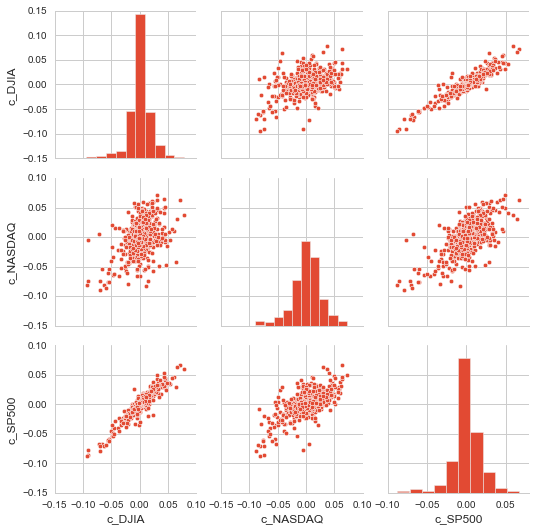

In [79]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(index_rets.dropna())

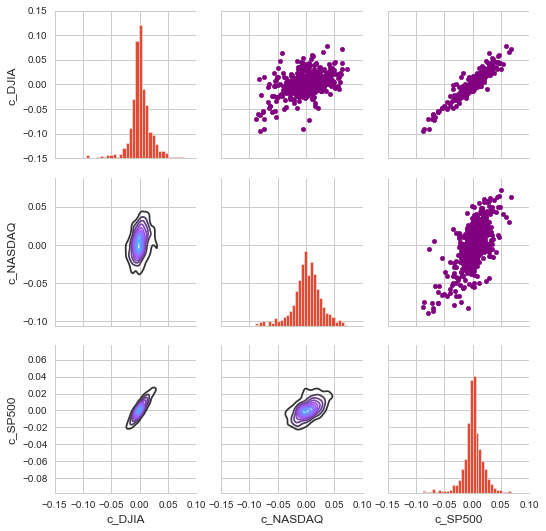

In [80]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(index_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

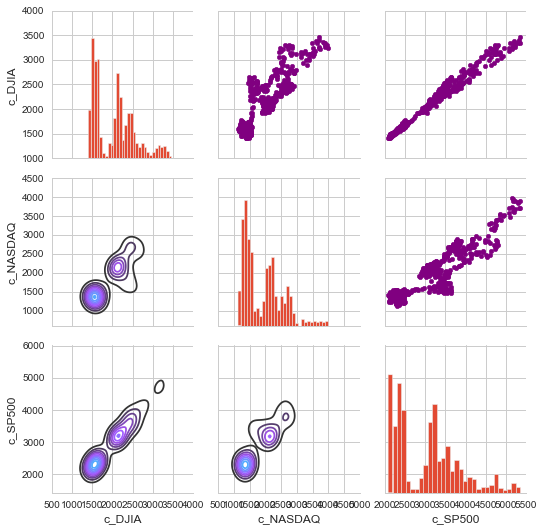

In [81]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df_close)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

### Q6 - Risk Analysis

In [67]:
# Let's start by defining a new DataFrame as a clenaed version of the original index_rets DataFrame
rets = index_rets.dropna()

In [68]:
#mean of daily returns
rets.mean()

c_DJIA      0.0006
c_NASDAQ    0.0011
c_SP500     0.0006
dtype: float64

In [69]:
#standard deviation of daily returns
rets.std()

c_DJIA      0.0187
c_NASDAQ    0.0248
c_SP500     0.0182
dtype: float64

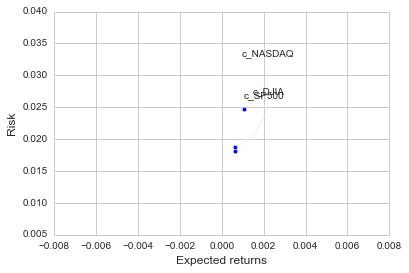

In [72]:
### size of the dot
area = np.pi *20 

#Make a scatter plot of x vs y, mean of daily returns as x-axis, std of daily returns as y-axis
plt.scatter(rets.mean(),rets.std()) 

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

###  Q6 - Value at Risk using the "bootstrap" method

Let's go ahead and define a value at risk parameter (VaR) for our stock indices. We can treat value at risk (VaR) as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There are several methods we can use for estimating a value at risk. The most common two are using the "bootstrap" method and the Monte Carlo method. 

We will use the "bootstrap" method to evaulate value at risk. For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile.

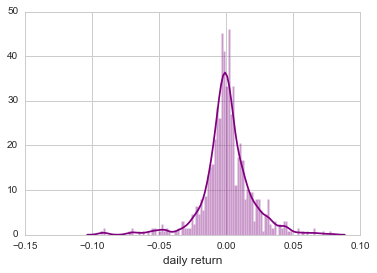

In [83]:
sns.distplot(c_DJIA_a['daily return'].dropna(),bins=100,color='purple')

In [84]:
df_close.tail()

,c_DJIA,c_NASDAQ,c_SP500
date,,,
2016-07-29,2155.24,2122.412,3203.930
2016-08-01,2147.56,2099.179,3176.809
2016-08-02,2148.45,2113.214,3189.052
2016-08-03,2145.79,2108.314,3193.507
2016-08-04,2143.84,2129.652,3201.288


In [85]:
df_close.head()

,c_DJIA,c_NASDAQ,c_SP500
date,,,
2013-08-06,1556.297,1211.782,2293.641
2013-08-07,1551.155,1175.702,2280.623
2013-08-08,1544.624,1185.955,2276.782
2013-08-09,1553.044,1172.519,2286.010
2013-08-12,1610.265,1161.872,2352.794


In [91]:
rets['c_DJIA'].quantile(0.05)

-0.025861416771458

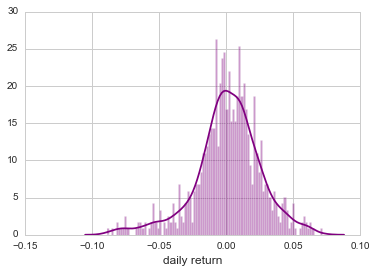

In [89]:
sns.distplot(c_NASDAQ_a['daily return'].dropna(),bins=100,color='purple')

In [90]:
rets['c_NASDAQ'].quantile(0.05)

-0.044549694424439554

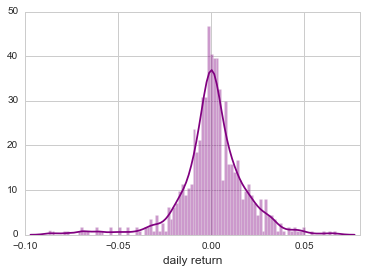

In [92]:
sns.distplot(c_SP500_a['daily return'].dropna(),bins=100,color='purple')

In [93]:
rets['c_SP500'].quantile(0.05)

-0.027171405949020344

# Conclusion

This report analyses the price change of SSE 50 Index (referred as c_DJIA), CSI 300 Index (referred as c_SP500) and Growth Enterprise Index (referred as c_NASDAQ) in china stock market from 06/2015 to 08/2016. As time went on, the striking contrast between the prices of c_DJIA and c_NASDAQ faded away to about the same, with c_DJIA still slightly more. And there is stronger correlation between c_DJIA and c_SP500 closing prices as well as daily returns. Furthermore, all the closing prices and daily returns of indices are positively correlated. In the end, risk analysis shows that investing c_NASDAQ produced highest expected return along with highest risk, while investing other indices produced similar expected return with similar risk.